## Non-Linear Transformations
Log transformations are one of several different techniques that fundamentally reshape the modeled relationship between the variables. Unlike linear transformations, we won't be able to "go back" to the initial or original linear coefficients, because what we are modeling is not the same relationship

The reason to apply this kind of transformation is that you believe that the underlying relationship is not linear. Then by applying these techniques, you may be able to model a linear relationship between the transformed variables, even though there wasn't a linear relationship between the raw, un-transformed variables

In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
math.e

2.718281828459045

When x=10, this means:

e\*\*10≈(2.71828\*\*10)≈22026.465

In [3]:
# original x
x = np.arange(0, 10, 0.5)
x


array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [4]:
# natural exponential function applied to x
e_x = np.exp(x)
e_x

array([1.00000000e+00, 1.64872127e+00, 2.71828183e+00, 4.48168907e+00,
       7.38905610e+00, 1.21824940e+01, 2.00855369e+01, 3.31154520e+01,
       5.45981500e+01, 9.00171313e+01, 1.48413159e+02, 2.44691932e+02,
       4.03428793e+02, 6.65141633e+02, 1.09663316e+03, 1.80804241e+03,
       2.98095799e+03, 4.91476884e+03, 8.10308393e+03, 1.33597268e+04])

<AxesSubplot:>

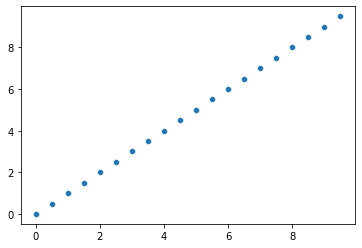

In [5]:

sns.scatterplot(x=x,y=x)




<AxesSubplot:>

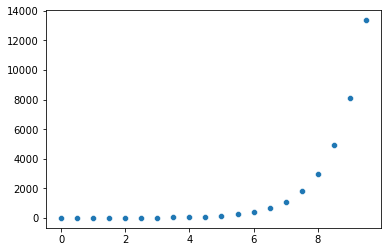

In [6]:
sns.scatterplot(x=x,y=e_x)

Then the natural logarithm is the inverse of e x 

In [7]:
# natural log of natural exponent of x
ln_e_x = np.log(e_x)
ln_e_x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

<AxesSubplot:>

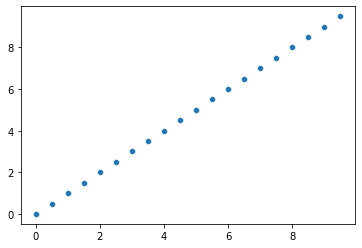

In [8]:
sns.scatterplot(x=x,y=ln_e_x)

The reason you would apply a log transformation is that you are trying to go from the middle graph (exponential relationship) to the graph on the last (linear relationship).

### Baseline Auto MPG Model
Let's look at a baseline model that uses the Auto MPG dataset:

In [9]:
data = pd.read_csv("./data/auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

,weight,model year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70
...,...,...
387,2790,82
388,2130,82
389,2295,82
390,2625,82


In [10]:
def print_results(sk_model,ols_model):
    print(f"""

StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

In [11]:
def build_ols_sk_model(X,y):
    
    ols_model = sm.OLS(y,sm.add_constant(X))
    ols_results = ols_model.fit()
    
    sk_model = LinearRegression()
    sk_results = sk_model.fit(X=X,y=y)
    
    print_results(sk_results,ols_results)
    
    return (ols_results,sk_results)

## Raw Model

In [12]:
ols_raw_results,sk_raw_results = build_ols_sk_model(X=X_raw,y=y_raw)    



StatsModels intercept:    -14.347253017615568
scikit-learn intercept:   -14.347253017615852

StatsModels coefficient:
const        -14.347253
weight        -0.006632
model year     0.757318
dtype: float64
scikit-learn coefficient: [-0.00663208  0.75731828]



In [13]:
ols_raw_results.rsquared

0.8081803058793998

### Log Transforming a Feature
Let's try building a model that uses the log of weight rather than the raw values.

In [14]:
# rainbow test between mpg and weight 

In [15]:
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log

,weight,model year,log(weight)
0,3504,70,8.161660
1,3693,70,8.214194
2,3436,70,8.142063
3,3433,70,8.141190
4,3449,70,8.145840
...,...,...,...
387,2790,82,7.933797
388,2130,82,7.663877
389,2295,82,7.738488
390,2625,82,7.872836


<AxesSubplot:xlabel='log(weight)', ylabel='mpg'>

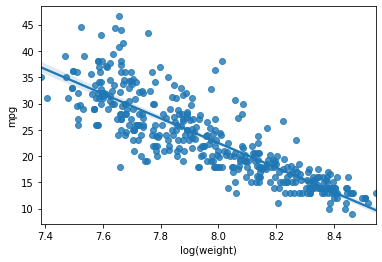

In [16]:
sns.regplot(x=X_weight_log["log(weight)"],y=y_raw) 


<AxesSubplot:xlabel='weight', ylabel='mpg'>

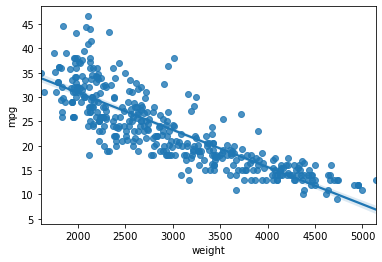

In [17]:
sns.regplot(x=X_raw["weight"],y=y_raw) 


In [18]:
X_weight_log.drop(columns="weight",inplace=True)

## Plotting  

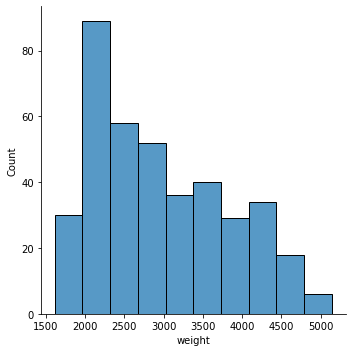

In [19]:
sns.displot(x=X_raw["weight"])

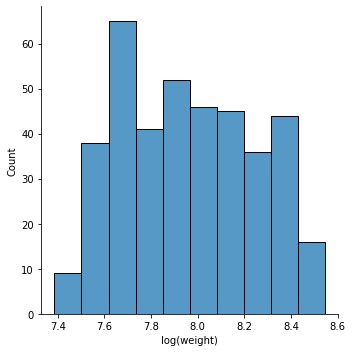

In [20]:
sns.displot(x=X_weight_log["log(weight)"])

### Modeling


In [21]:
ols_log_result,sk_log_results =  build_ols_sk_model(X=X_weight_log,y=y_raw)



StatsModels intercept:    127.2362107842992
scikit-learn intercept:   127.23621078429886

StatsModels coefficient:
const          127.236211
model year       0.780894
log(weight)    -20.494864
dtype: float64
scikit-learn coefficient: [  0.78089418 -20.49486437]



For the coefficients that were not transformed, their interpretation is the same. For example, the interpretation of model year's coefficient is now:

    For each increase of 1 year in model year, we see an associated increase of about 0.78 in MPG

The log transformed coefficient is more complicated. It would be technically correct, but not particularly useful, to say this:

    For each increase of 1 in the natural log of the weight, we see an associated decrease of about 20 in MPG

But what does it mean to increase the natural log of the weight by 1?

### Log Transformed Coefficients are Multiplicative

If we add 1 to the natural log of the weight, that means we are multiplying the underlying variable by e . So another technically correct explanation would be:

    For each time we multiply the weight by about 2.72 ( e ), we see an associated decrease of about 20 in MPG


There is also a quicker way to do this, which takes advantage of a property of the natural logarithm where:

l o g ( 1.01 ) ≈ 0.01 

In [22]:
np.log(1.01)

0.009950330853168092

In [23]:
ols_log_result.params["log(weight)"] * np.log(1.02)
ols_log_result.rsquared

0.8373035605776726

In [24]:
ols_log_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):          4.10e-154
Time:                        12:48:36   Log-Likelihood:                -1005.3
No. Observations:                 392   AIC:                             2017.
Df Residuals:                     389   BIC:                             2028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.2362      6.587     19.316      0.000     114.285     140.187
model year      0.7809      0.045     17.263      0.000       0.692       0.870
log(weight)   -20.4949      0.593    -34.585      0.000     -21.660     -19.330
==============================================================================
Omnibus:                       57.816   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.132
Skew:                           0.773   Prob(JB):                     2.48e-28
Kurtosis:                       5.323   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, the conventional way to interpret a log-transformed coefficient is like this:

    For each increase of 1% in <feature>, we see an associated change of <coefficient / 100> in <target>

For this particular model, that means:

    For each increase of 1% in weight, we see an associated decrease of about 0.2 in MPG


In [25]:
np.log(1.01)

0.009950330853168092

In [26]:
np.log(1.6)

0.47000362924573563

In [27]:
# To describe this in terms of a 50% increase, we would want to multiply the coefficient by this value:

ols_log_result.params["log(weight)"] * np.log(1.5)

-8.30995239625864

## Model with a Log Transformed Target

Transforming the target ( y ) of a linear regression impacts not only the interpretation of the coefficients, but also the interpretation of the model overall.

If you fit a model with a log-transformed target, the algorithm will be minimizing the errors in l o g ( y ) units rather than y units. In other words, minimizing the percentage/proportional/multiplicative error rather than the raw additive error.

This also means that the R-Squared (percentage of variance explained) and RMSE (average error) cannot be compared between models with raw y and l o g ( y ) targets. Instead you will need to rely on other factors, including domain understanding, to determine whether transforming the target improves the model.

In [28]:
y_log = np.log(y_raw)
y_log.name = "log(mpg)"
y_log

0      2.890372
1      2.708050
2      2.890372
3      2.772589
4      2.833213
         ...   
387    3.295837
388    3.784190
389    3.465736
390    3.332205
391    3.433987
Name: log(mpg), Length: 392, dtype: float64

In [29]:
ols_log_y_result,sk_log__results =  build_ols_sk_model(X=X_raw,y=y_log)



StatsModels intercept:    1.6397283987956133
scikit-learn intercept:   1.6397283987955895

StatsModels coefficient:
const         1.639728
weight       -0.000309
model year    0.031291
dtype: float64
scikit-learn coefficient: [-0.0003086  0.0312909]



In [30]:
ols_log_y_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log(mpg)   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1310.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):          1.59e-173
Time:                        12:48:36   Log-Likelihood:                 268.08
No. Observations:                 392   AIC:                            -530.2
Df Residuals:                     389   BIC:                            -518.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6397      0.143     11.442      0.000       1.358       1.921
weight        -0.0003   7.67e-06    -40.212      0.000      -0.000      -0.000
model year     0.0313      0.002     17.683      0.000       0.028       0.035
==============================================================================
Omnibus:                        7.706   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               11.581
Skew:                          -0.096   Prob(JB):                      0.00306
Kurtosis:                       3.820   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Once again, we could interpret the coefficients in a way that is technically correct but not especially useful:

    For each increase of 1 lb in weight, we see an associated decrease of about 0.0003 in the natural log of the MPG

    For each increase of 1 year in model year, we see an associated increase of about 0.03 in the natural log of the MPG


A decrease in l o g ( M P G ) of 0.0003 is equivalent to multiplying MPG by e** 0.0003 :

In [31]:
np.exp(ols_log_y_result.params["weight"])

0.99969144664818

In other words, increasing weight by 1 causes MPG to become about 99.969% of its original value.

In [32]:
(np.exp(ols_log_y_result.params["weight"])-1) * 100

-0.030855335182000676

### for small coefficients, the conventional way to interpret a log-transformed target is this:

    For each increase of 1 unit in <feature>, we see an associated change of <coefficient * 100>% in <target>

For this particular model, that means:

    For each increase of 1 lb in weight, we see an associated decrease of about 0.03% in MPG

    For each increase of 1 year in model year, we see an associated increase of about 3.1% in MPG


### For large Coeficients

In [33]:
coff = -5.05505

(np.exp(coff)-1)*100

-99.36229520980345

In [34]:
coff *100

-505.50499999999994

In [35]:
(np.exp(ols_log_y_result.params["weight"]) - 1) * 100

-0.030855335182000676

### Model with a Log Transformed Predictor and Target

In [36]:
ols_log_x_y_result,sk_log_x_y_results =  build_ols_sk_model(X=X_weight_log,y=y_log)



StatsModels intercept:    8.039451263889621
scikit-learn intercept:   8.0394512638896

StatsModels coefficient:
const          8.039451
model year     0.032817
log(weight)   -0.934085
dtype: float64
scikit-learn coefficient: [ 0.03281687 -0.93408505]



One last time, we could interpret the coefficient like this and would be technically correct:

    For each increase of 1 in the natural log of weight, there is a decrease of about 0.9 ( β ) in the natural log of MPG


In [37]:
(np.exp(np.log(1.01) * ols_log_x_y_result.params["log(weight)"]) - 1) * 100

-0.9251395323337741

For each increase of 1% in weight, we see an associated decrease of about 0.9% in MPG